**SM339 &#x25aa; Applied Statistics &#x25aa; Spring 2024 &#x25aa; Uhan**

# Lesson 9. Transformations

_Setup._ Tweak the width and height values below to adjust the size of your plots in this notebook.

In [1]:
options(repr.plot.width=5, repr.plot.height=5)

## Overview

- If one or more of the conditions for a simple linear regression model are not satisfied, then a _possible_ solution is to __transform__ one or both variables

- Some of the most common transformations are:
    - $x^2$
    - $1 / x$
    - $\sqrt{x}$
    - $\log(x)$ (natural logarithm)

## Example 1

The data frame `SpeciesArea` in the `Stat2Data` package contains the number of mammal species and the area for 13 islands in Southeast Asia. Let's take a peek:

In [2]:
library(Stat2Data)
data(SpeciesArea)
head(SpeciesArea)

,Name,Area,Species,logArea,logSpecies
,<fct>,<int>,<int>,<dbl>,<dbl>
1,Borneo,743244,129,13.51880,4.85981
2,Sumatra,473607,126,13.06810,4.83628
3,Java,125628,78,11.74110,4.35671
4,Bangka,11964,38,9.38966,3.63759
5,Bunguran,1594,24,7.37400,3.17805
6,Banggi,450,18,6.10925,2.89037


Biologists have speculated that the number of species (`Species`) is related to the size of an island (`Area`) and would like to be able to predict the number of species present, given the size of an island.

* First, let's create a scatterplot with response `Species` and predictor `Area`:

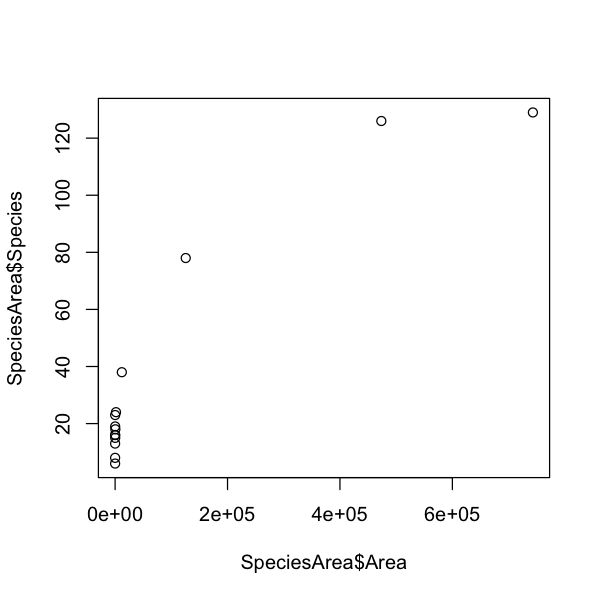

In [3]:
# Solution
plot(SpeciesArea$Area, SpeciesArea$Species)

* Now, let's fit a simple linear regression model and check the diagnostic plots (spoiler alert &ndash; it's not a good fit):

In [4]:
# Solution
fit <- lm(Species ~ Area, data = SpeciesArea)

In [5]:
# Solution
summary(fit)


Call:
lm(formula = Species ~ Area, data = SpeciesArea)

Residuals:
    Min      1Q  Median      3Q     Max 
-20.808  -7.494  -4.027   2.554  35.242 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.098e+01  4.621e+00   4.541 0.000677 ***
Area        1.733e-04  1.942e-05   8.925 1.21e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15.79 on 12 degrees of freedom
Multiple R-squared:  0.8691,	Adjusted R-squared:  0.8582 
F-statistic: 79.66 on 1 and 12 DF,  p-value: 1.206e-06


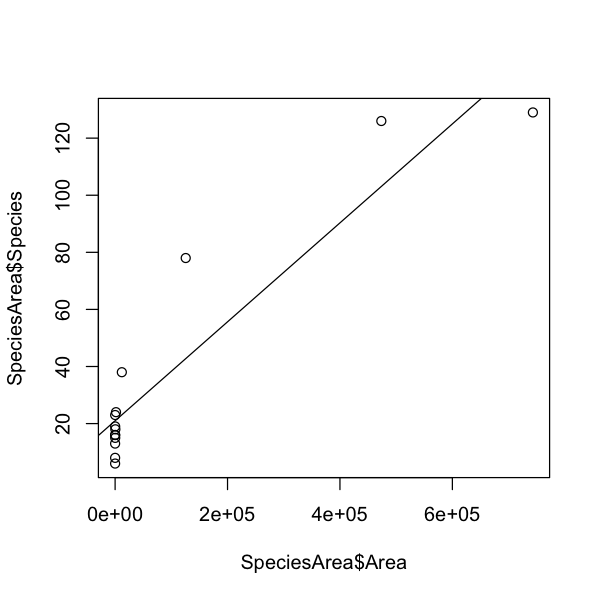

In [6]:
# Solution
plot(SpeciesArea$Area, SpeciesArea$Species)
abline(fit)

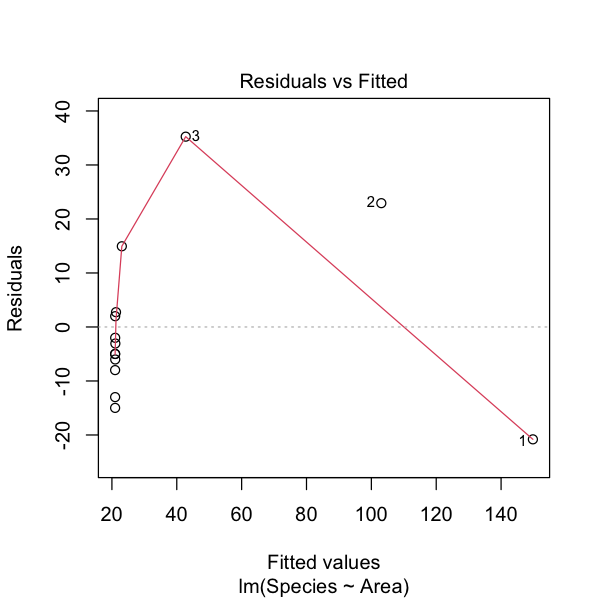

In [7]:
# Solution
plot(fit, which=1)

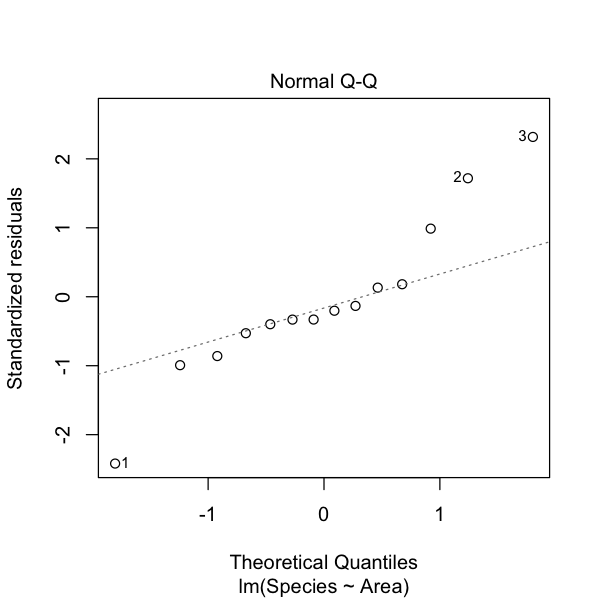

In [8]:
# Solution
plot(fit, which=2)

* Let's try transforming `Species` and/or `Area`!

* One idea would be to apply the natural logarithm to both variables

* We can add two columns to the `SpeciesArea` data frame, one containing the log of `Species`, and the other containing the log of `Area`: 

In [9]:
# Solution
SpeciesArea$LogArea <- log(SpeciesArea$Area)
SpeciesArea$LogSpecies <- log(SpeciesArea$Species)

* Let's check our work:

In [10]:
# Solution
head(SpeciesArea)

,Name,Area,Species,logArea,logSpecies,LogArea,LogSpecies
,<fct>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,Borneo,743244,129,13.51880,4.85981,13.518780,4.859812
2,Sumatra,473607,126,13.06810,4.83628,13.068133,4.836282
3,Java,125628,78,11.74110,4.35671,11.741080,4.356709
4,Bangka,11964,38,9.38966,3.63759,9.389657,3.637586
5,Bunguran,1594,24,7.37400,3.17805,7.374002,3.178054
6,Banggi,450,18,6.10925,2.89037,6.109248,2.890372


* Let's fit a simple linear regression model and check the diagnostic plots

In [11]:
# Solution
fit <- lm(LogSpecies ~ LogArea, data = SpeciesArea)

In [12]:
# Solution
summary(fit)


Call:
lm(formula = LogSpecies ~ LogArea, data = SpeciesArea)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.32280 -0.18071  0.00079  0.16356  0.39534 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.6249     0.1326   12.26 3.81e-08 ***
LogArea       0.2355     0.0175   13.46 1.34e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2427 on 12 degrees of freedom
Multiple R-squared:  0.9379,	Adjusted R-squared:  0.9327 
F-statistic: 181.1 on 1 and 12 DF,  p-value: 1.335e-08


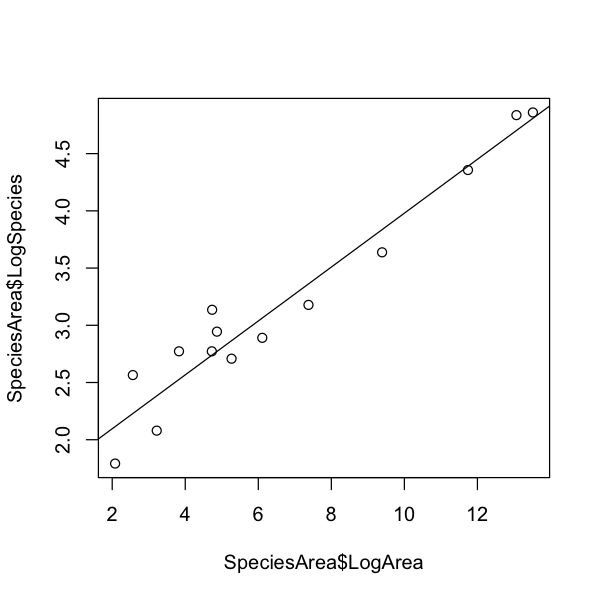

In [13]:
# Solution
plot(SpeciesArea$LogArea, SpeciesArea$LogSpecies)
abline(fit)

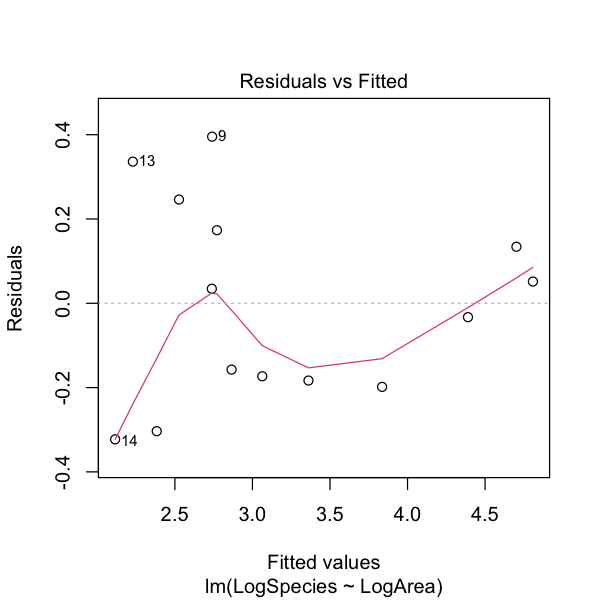

In [14]:
# Solution
plot(fit, which=1)

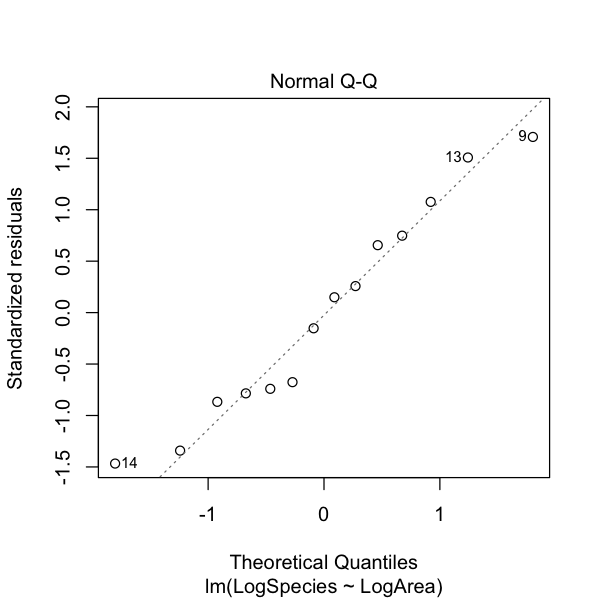

In [15]:
# Solution
plot(fit, which=2)

* What do you think about the fit of this model?

*Write your answer here. Double-click to edit.*

- __Linearity__

- __Independence__

- __Normality__

- __Equal variance__

- __Randomness__

*Solution.*

- __Linearity__: Questionable. Looking at the residual vs. fitted values plot, we see that the points in the middle not evenly distributed above and below the residual = 0 line.

- __Independence__: Depends on data collection method, need more information.

- __Normality__: Seems OK. Looking at the Normal Q-Q plot of the residuals, the points form an approximately straight line.

- __Equal variance__: Questionable. Looking at the residual vs. fitted values plot, there appears to be more variance in the residuals for lower fitted values of `LogSpecies`.

- __Randomness__: Depends on data collection method, need more information.

* Let's state the fitted model below, making sure to include the transformations:

*Write your answer here. Double-click to edit.*

*Solution.*

$$ \widehat{\log(\mathit{Species})} = 1.625 + 0.2355 \log(\mathit{Area})$$

* We can now use the fitted model to predict the number of species for the island of Java, which has an area of 125,628 squared kilometers:

*Write your answer here. Double-click to edit.*

In [16]:
# Solution
PredictedLogSpecies <- 1.625 + 0.2355 * log(125628)
PredictedLogSpecies

PredictedSpecies <- exp(PredictedLogSpecies)
PredictedSpecies

[1] 4.390024

[1] 80.64239

*Solution.*

$$ \widehat{\log(\mathit{Species})} = 1.625 + 0.2355 \log(125628) = 4.390 $$

Therefore,

$$ \widehat{\mathit{Species}} = e^{4.390} = 80.64 $$ 

## Cautions about transformations

- __Transformations change the scale of the data!__

- Therefore, we must be __very careful__ about interpretations

- Back-transforming a _point estimate of the response_ (to get back to the original scale), like we did in this example, is OK

- Back-transforming _parameter estimates or CI endpoints_ needs to be done __very carefully__ to ensure accurate interpretations
    - Only in a few cases will this result in meaningful interpretations

- Transformations can be helpful in certain situations, but are __often not the best option to address violation of model conditions__

## Extrapolation

- Extrapolation is when we make predictions (using our fitted model) outside the range of the explanatory variables in the data

- This is a __BAD IDEA__, because we have no idea what the pattern in the data looks like beyond the values we're working with

<img src="img/Extrapolation.png" width="500" alt="https://xkcd.com/605">